In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

def label_type(row):
    if row['scaled_effect'] < .99:
        return('Deleterious')
    elif row['scaled_effect'] > 1.1:
        return('Beneficial')
    else:
        return('Netural')
    

In [31]:
merged_shell1 = pd.read_csv('data/merged_shell1.csv')
merged_shell6 = pd.read_csv('data/merged_shell6.csv')

In [19]:
train_data = merged_shell1[merged_shell1.protein != 'Kka2'].drop(['protein', 'pdb', 'resnum','resid'], axis=1)
train_data['type'] = train_data.apply(lambda row: label_type(row), axis = 1)
train_data.drop(['scaled_effect'], axis=1, inplace=True)
test_data = merged_shell1[merged_shell1.protein == 'Kka2'].drop(['protein', 'pdb', 'resnum', 'resid'], axis=1)
test_data['type'] = test_data.apply(lambda row: label_type(row), axis = 1)
test_data.drop(['scaled_effect'], axis=1, inplace=True)

In [20]:
y_train = train_data.type
x_train = preprocessing.scale(train_data.drop(['type'], axis=1))
y_test = test_data.type
x_test = preprocessing.scale(test_data.drop(['type'], axis=1))

Accuracy: 0.8728021978021978
Precision: 0.8236534660690031


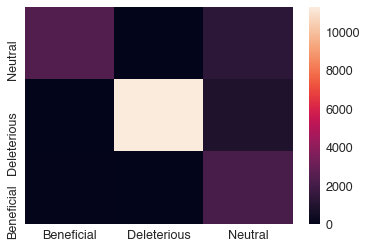

In [21]:
logreg = LogisticRegression(multi_class = 'ovr', max_iter = 1000)
logreg.fit(x_train, y_train)
probs = logreg.predict_proba(x_test)

#Precision and Accuracy
predictions = logreg.predict(x_test)
precision = precision_score(y_test, predictions, average="macro")
score = logreg.score(x_test, y_test)
print('Accuracy: {}'.format(score))
print('Precision: {}'.format(precision))

# Confusion Matrix Heatmap
cmatrix = confusion_matrix(y_test, predictions)
sns.heatmap(cmatrix, xticklabels = ['Beneficial', 'Deleterious', 'Neutral'], yticklabels = ['Neutral', 'Deleterious', 'Beneficial'])
plt.savefig('img/kka2-lopo-logreg-cmatrix.png', dpi=300)

In [27]:
def logreg_test(protein, shell):
    if shell == 1:
        shell_data = merged_shell1
    else:
        shell_data = merged_shell6
    
    train_data = shell_data[shell_data.protein != protein].drop(['protein', 'pdb', 'resnum','resid'], axis=1)
    train_data['type'] = train_data.apply(lambda row: label_type(row), axis = 1)
    train_data.drop(['scaled_effect'], axis=1, inplace=True)
    test_data = shell_data[shell_data.protein == protein].drop(['protein', 'pdb', 'resnum', 'resid'], axis=1)
    test_data['type'] = test_data.apply(lambda row: label_type(row), axis = 1)
    test_data.drop(['scaled_effect'], axis=1, inplace=True)
    
    y_train = train_data.type
    x_train = preprocessing.scale(train_data.drop(['type'], axis=1))
    y_test = test_data.type
    x_test = preprocessing.scale(test_data.drop(['type'], axis=1))
    
    logreg = LogisticRegression(multi_class = 'ovr', max_iter = 1000)
    logreg.fit(x_train, y_train)
    probs = logreg.predict_proba(x_test)

    #Precision and Accuracy
    predictions = logreg.predict(x_test)
    precision = precision_score(y_test, predictions, average="macro")
    score = logreg.score(x_test, y_test)
    print('Accuracy: {}'.format(score))
    print('Precision: {}'.format(precision))

    # Confusion Matrix Heatmap
    cmatrix = confusion_matrix(y_test, predictions)
    sns.heatmap(cmatrix, xticklabels = ['Beneficial', 'Deleterious', 'Neutral'], yticklabels = ['Neutral', 'Deleterious', 'Beneficial'])
    plt.savefig('img/' + protein + '-lopo-logreg-cmatrix.png', dpi=300)

Accuracy: 0.850054945054945
Precision: 0.7917188512417074


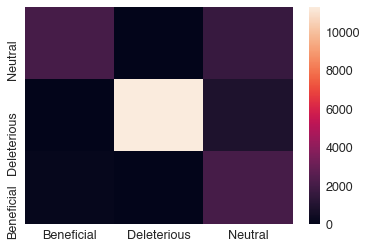

In [32]:
logreg_test('Kka2', 6)

Accuracy: 0.6916471179624665
Precision: 0.7578304122338135


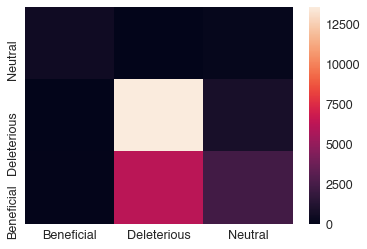

In [33]:
logreg_test('TEM-1', 6)

Accuracy: 0.6143646408839779
Precision: 0.3333333333333333


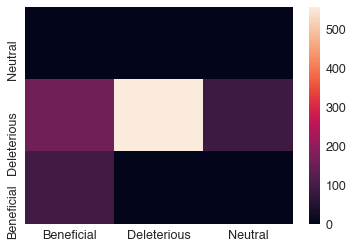

In [34]:
logreg_test('Uba1', 6)